# Loading the gdrive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# Importing the Libraries

In [2]:
import numpy as np                    # Mathematical Calculations
import pandas as pd                   # Manipulation of raw data
import matplotlib.pyplot as plt       # Plotting the graphs
import seaborn as sns
import plotly.express as px           # For creating interactive publication quality graphs
%matplotlib inline

# Importing the Dataset

In [3]:
data = pd.read_excel('/gdrive/My Drive/TROP-ICSU-Internship-Sahil-Ashutosh/Assignment-1-Emissions/Analysis/Data/1951-1990/GHG/Greenhouse_Gases_(1951-1990).xlsx')

In [4]:
data.head()

,country,year,co2,methane,nitrous_oxide,total_ghg
0,Afghanistan,1951,0.092,13.111,5.365,59.631
1,Afghanistan,1952,0.092,13.111,5.365,59.631
2,Afghanistan,1953,0.106,13.111,5.365,59.631
3,Afghanistan,1954,0.106,13.111,5.365,59.631
4,Afghanistan,1955,0.154,13.111,5.365,59.631


In [5]:
data.tail()

,country,year,co2,methane,nitrous_oxide,total_ghg
7080,Zimbabwe,1986,13.068,15.265,7.248,89.641
7081,Zimbabwe,1987,15.170,14.068,7.004,84.993
7082,Zimbabwe,1988,16.029,12.872,6.759,80.345
7083,Zimbabwe,1989,16.114,11.676,6.515,75.698
7084,Zimbabwe,1990,15.569,10.480,6.270,71.050


In [6]:
data = data.round(4)

In [7]:
data.drop('total_ghg', axis = 1, inplace = True)

# Normalizing the data into the scale of 0 and +1 by using min-max scaler function

In [8]:
from sklearn.preprocessing import MinMaxScaler
# Storing the MinMaxScaler in the variable scalerr
scaler = MinMaxScaler()

In [9]:
# Performing the scaling on the co2 attribute
scaler.fit(data[['co2']])
data[['co2']]=scaler.transform(data[['co2']])
data.head()

,country,year,co2,methane,nitrous_oxide
0,Afghanistan,1951,0.000103,13.111,5.365
1,Afghanistan,1952,0.000103,13.111,5.365
2,Afghanistan,1953,0.000106,13.111,5.365
3,Afghanistan,1954,0.000106,13.111,5.365
4,Afghanistan,1955,0.000115,13.111,5.365


In [10]:
# Performing the scaling on the methane attribute
scaler.fit(data[['methane']])
data[['methane']]=scaler.transform(data[['methane']])
data.head()

,country,year,co2,methane,nitrous_oxide
0,Afghanistan,1951,0.000103,0.013436,5.365
1,Afghanistan,1952,0.000103,0.013436,5.365
2,Afghanistan,1953,0.000106,0.013436,5.365
3,Afghanistan,1954,0.000106,0.013436,5.365
4,Afghanistan,1955,0.000115,0.013436,5.365


In [11]:
# Performing the scaling on the nitrous_oxide attribute
scaler.fit(data[['nitrous_oxide']])
data[['nitrous_oxide']]=scaler.transform(data[['nitrous_oxide']])
data.head()

,country,year,co2,methane,nitrous_oxide
0,Afghanistan,1951,0.000103,0.013436,0.017202
1,Afghanistan,1952,0.000103,0.013436,0.017202
2,Afghanistan,1953,0.000106,0.013436,0.017202
3,Afghanistan,1954,0.000106,0.013436,0.017202
4,Afghanistan,1955,0.000115,0.013436,0.017202


# Creating some interactive graphs and maps for CO2 emissions

In [12]:
# Showing the top 5 countries emitting the highest amount of CO2 

top_co2 = data.groupby('country')['co2'].sum().reset_index().sort_values(by=['co2'], ascending=False).head(5)['country'].tolist()

fig = px.line(
    data[data['country'].isin(top_co2)],
    x='year',
    y='co2',
    color='country',
    title = 'Top countries with highest CO2 emissions measured in Million Tonnes Per Year '
)

fig.show()

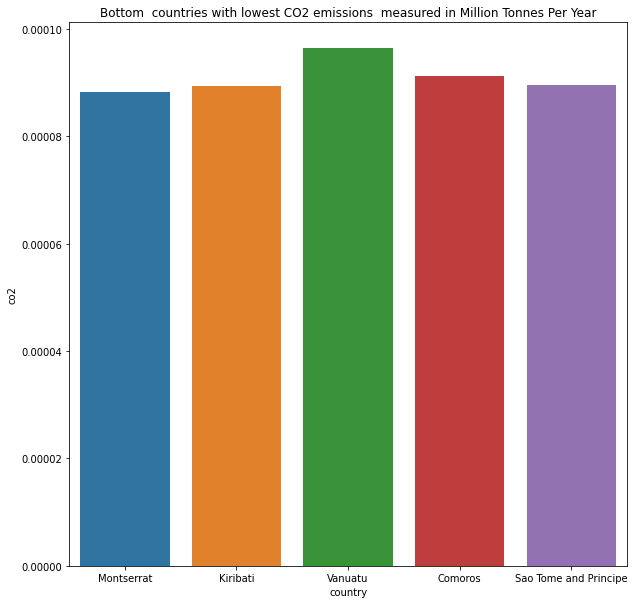

In [13]:
# Showing the bottom 5 countries emitting the lowest amount of CO2 

bottom_co2 = data.groupby('country')['co2'].sum().reset_index().sort_values(by=['co2'], ascending=True).head(5)['country'].tolist()

plt.figure(figsize=(10,10))
g = sns.barplot(
    data = data[data['country'].isin(bottom_co2)],
    x ='country',
    y ='co2',
    order = bottom_co2,
    ci=None
)
plt.title('Bottom  countries with lowest CO2 emissions  measured in Million Tonnes Per Year')
plt.show()

In [14]:
# Creating a time series chloropleth map for CO2 emissions 
fig = px.choropleth(
    data.groupby(['country', 'year'])['co2'].sum().reset_index().sort_values(by=['year'], ascending=True),
    locations='country',
    locationmode='country names',
    color='co2',
    color_continuous_scale='Spectral_r', # (_r) is used for inverting the color ramp
    height=750,
    animation_frame='year',
    animation_group='country'
)

fig.update_layout(
    title='CO2 Emissions in Million Tonnes Per Year'
)

fig.show()

# Creating some interactive graphs and maps for methane emissions

In [15]:
# Showing the top 5 countries emitting the highest amount of Methane Emissions

top_methane = data.groupby('country')['methane'].sum().reset_index().sort_values(by=['methane'], ascending=False).head(5)['country'].tolist()

fig = px.line(
    data[data['country'].isin(top_methane)],
    x='year',
    y='methane',
    color='country',
    title = 'Top countries with highest Methane Emissions measured in Million Tonnes of Carbon Dioxide Equivalents '
)

fig.show()

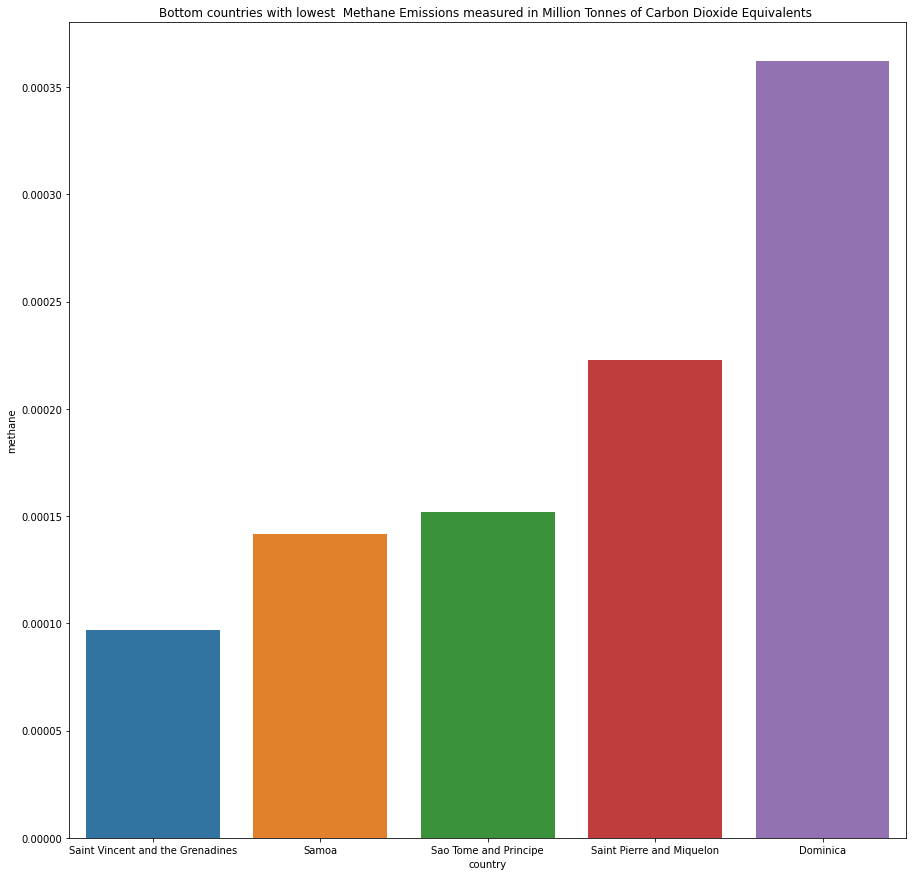

In [16]:
# Showing the bottom 5 countries emitting the lowest amount of Methane Emissions

bottom_methane = data.groupby('country')['methane'].sum().reset_index().sort_values(by=['methane'], ascending=True).head(5)['country'].tolist()

plt.figure(figsize=(15, 15))
g = sns.barplot(
    data = data[data['country'].isin(bottom_methane)],
    x ='country',
    y ='methane',
    order = bottom_methane,
    ci=None
)

#g.set(ylim=(0,0.004))
plt.title('Bottom countries with lowest  Methane Emissions measured in Million Tonnes of Carbon Dioxide Equivalents ')
plt.show()

In [21]:
# Creating a time series chloropleth map for  methane emissions
fig = px.choropleth(
    data.groupby(['country', 'year'])['methane'].sum().reset_index().sort_values(by=['year'], ascending=True),
    locations='country',
    locationmode='country names',
    color='methane',
    color_continuous_scale='Spectral_r', # (_r) is used for inverting the color ramp
    height=750,
    animation_frame='year',
    animation_group='country'
)

fig.update_layout(
    title=' Methane Emissions'
)

fig.show()

# Creating some interactive graphs and maps for Nitrous Oxide Emissions

In [18]:
# Showing the top 5 countries emitting the highest amount of nitrous oxide

top_nitrous_oxide = data.groupby('country')['nitrous_oxide'].sum().reset_index().sort_values(by=['nitrous_oxide'], ascending=False).head(5)['country'].tolist()

fig = px.line(
    data[data['country'].isin(top_nitrous_oxide)],
    x='year',
    y='nitrous_oxide',
    color='country',
    title = 'Top countries with highest Nitrous Oxide Emissions measured in Million Tonnes of Carbon Dioxide Equivalents '
)

fig.show()

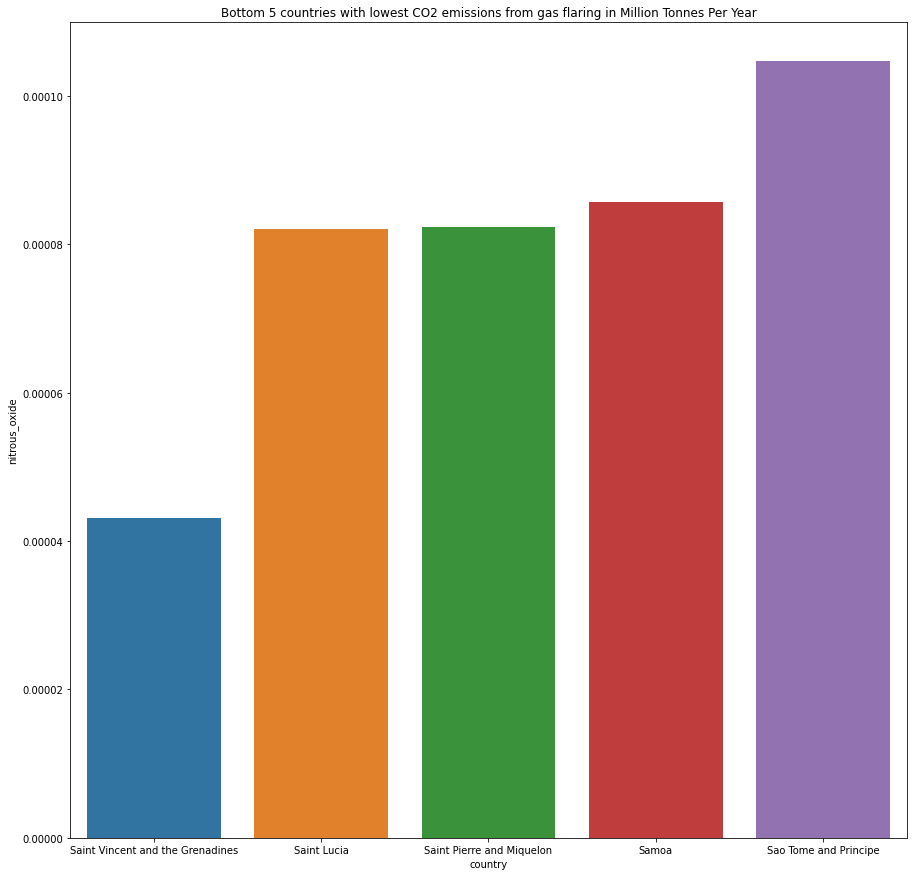

In [19]:
# Showing the bottom 5 countries emitting the lowest amount of Nitrous Oxide

bottom_nitrous_oxide = data.groupby('country')['nitrous_oxide'].sum().reset_index().sort_values(by=['nitrous_oxide'], ascending=True).head(5)['country'].tolist()

plt.figure(figsize=(15, 15))
g = sns.barplot(
    data = data[data['country'].isin(bottom_nitrous_oxide)],
    x ='country',
    y ='nitrous_oxide',
    order = bottom_nitrous_oxide,
    ci=None
)

# g.set(ylim=(0,0.004))
plt.title('Bottom 5 countries with lowest CO2 emissions from gas flaring in Million Tonnes Per Year')
plt.show()

In [20]:
# Creating a time series chloropleth map for nitrous_oxide
fig = px.choropleth(
    data.groupby(['country', 'year'])['nitrous_oxide'].sum().reset_index().sort_values(by=['year'], ascending=True),
    locations='country',
    locationmode='country names',
    color='nitrous_oxide',
    color_continuous_scale='Spectral_r', # (_r) is used for inverting the color ramp
    height=750,
    animation_frame='year',
    animation_group='country'
)

fig.update_layout(
    title='Nitrous Oxide Emissions'
)

fig.show()